# SVM from scratch

### Formulas :-

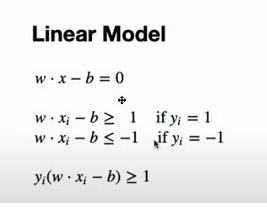

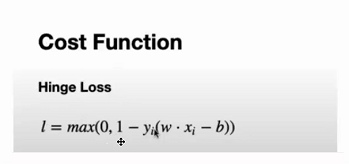

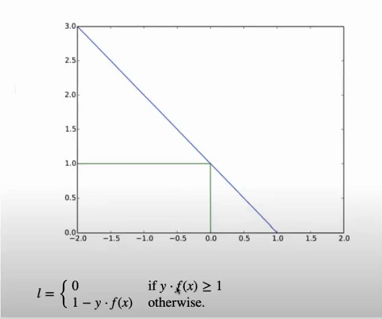

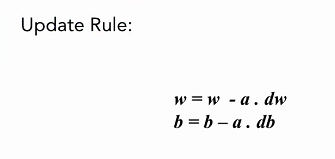

## Code

In [4]:
import numpy as np

In [7]:
class SVM:
    def __init__(self,learning_rate = 0.001, lambda_param = 0.01, n_iters =1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None 
        self.b = None
        
        
    def fit(self,X,y):
        n_samples, n_features  =  X.shape
        
        #Basic check to converty 0,1 to -1,1
        y_ = np.where(y<= 0, -1,1)
        
        #initialise
        self.w = np.zeros(n_features)
        self.b = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            # on every iteration
            for idx,x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i,self.w) - self.b) >=1
                
                if condition:
                    self.w -= self.lr * (2*self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2* self.lambda_param * self.w - np.dot(x_i,y[idx]))
                    self.b -= self.lr * y[idx]
    
    def predict(self,X):
        #w * x - b
        linear_model = np.dot(X,self.w) - self.b
        return np.sign(linear_model)

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

Making dataset to check our SVM model

In [5]:
X,y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05,random_state = 42)
y = np.where(y==0,-1,1)

Fitting SVM, and making predictions

In [10]:
clf = SVM()
clf.fit(X,y)
predictions = clf.predict(X)

Checking the predictions

In [11]:
predictions

array([ 1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.])

Bias: 

In [12]:
clf.b

-0.2630000000000002

Weight: 

In [13]:
clf.w

array([ 0.52735146, -0.08786235])

In [14]:
def visualize():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.scatter(X[:,0], X[:,1], marker='o', c=y)

  x0_1 = np.amin(X[:, 0])
  x0_2 = np.amax(X[:, 0])

  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)


  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)


  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)


  ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')


  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])

  ax.set_ylim([x1_min-3, x1_max+3])

  plt.show()


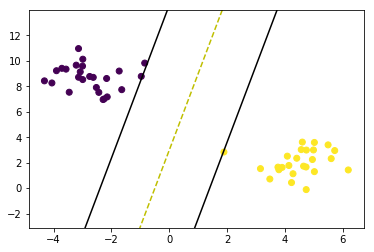

In [15]:
%matplotlib inline
visualize()